<h1> House Price Predictions</h1>

<b> By: Pavit Chawla, Gabriela Cortes-Media, Beatriz Ruiz, Abubakir Siedahmed, Sana Shaikh</b>

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<b> Preprocessing data by dropping null values, assigning feature selection and assigning our label</p>

In [87]:
#load data
house_df = pd.read_csv('https://raw.githubusercontent.com/BeatrizRuiz560/DataScienceFinal/raw/master/train.csv')


# drop any null/na values
drop = house_df.dropna(axis=1)

#print(drop)



house_features = ['MoSold','YrSold','BsmtFinSF1','LotArea','TotalBsmtSF','1stFlrSF','Street','CentralAir']


X = house_df[house_features]
y = house_df['SalePrice']





<b> Plotting our features against our label</b>

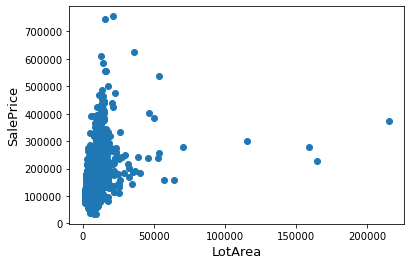

In [88]:
fig, ax = plt.subplots()
ax.scatter(x = house_df['LotArea'], y = house_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

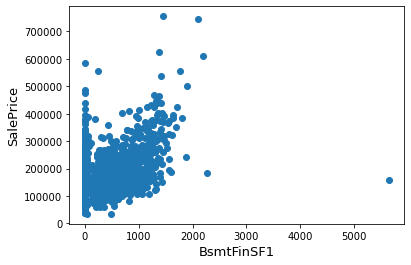

In [89]:
fig, ax = plt.subplots()
ax.scatter(x = house_df['BsmtFinSF1'], y = house_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('BsmtFinSF1', fontsize=13)
plt.show()

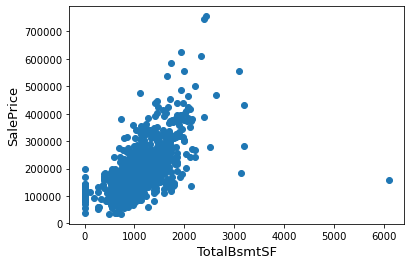

In [90]:
fig, ax = plt.subplots()
ax.scatter(x = house_df['TotalBsmtSF'], y = house_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()


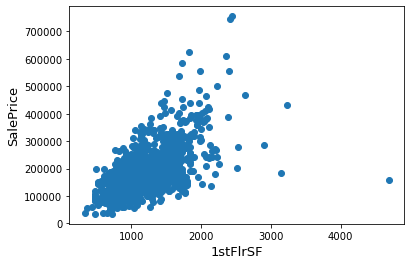

In [91]:
fig, ax = plt.subplots()
ax.scatter(x = house_df['1stFlrSF'], y = house_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

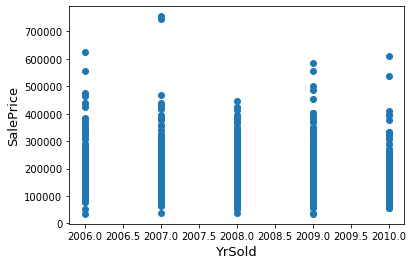

In [92]:
fig, ax = plt.subplots()
ax.scatter(x = house_df['YrSold'], y = house_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YrSold', fontsize=13)
plt.show()

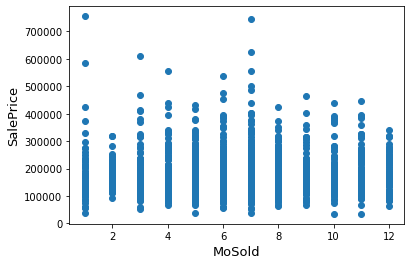

In [93]:
fig, ax = plt.subplots()
ax.scatter(x = house_df['MoSold'], y = house_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('MoSold', fontsize=13)
plt.show()

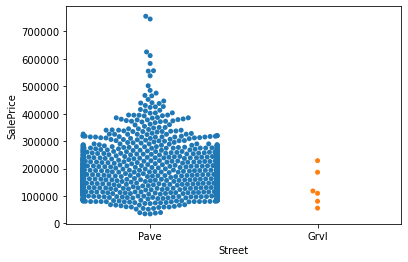

In [94]:
import seaborn as sns

ax = sns.swarmplot(data=house_df, x="Street", y="SalePrice")

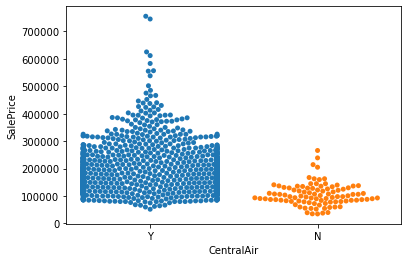

In [95]:
import seaborn as sns

ax = sns.swarmplot(data=house_df, x="CentralAir", y="SalePrice")

<b> Converting our Categorical features to numerical features using hot encoding and scaling all data</b>

In [96]:
house_catfeat = pd.get_dummies(X)


X_feat = house_catfeat
#print(X_feat)

X_Scaled = preprocessing.scale(X_feat)
#print(X_Scaled)


<b> Assigning our test and training data with a test size of 25 and random_state of 9</b>

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.25, 
                                                    random_state=9)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1095, 10)
(1095,)
(365, 10)
(365,)


<p><b> Apply Linear Regression, Knn Regressor, Random Forest Regressor, DecisionTreeRegressor and Cross Validation to our data and calculate RMSE and best and worst features</p></b>

In [98]:
#S Knn
#B linear regression
#G random forrest
#A Decision Tree/ANN
#P Cross Validation 


# Linear Regression Algorithm applied to test and train data set

house_lr = LinearRegression()
house_lr.fit(X_train,y_train)


print('Intercept:',house_lr.intercept_)
print('Coef: \n',house_lr.coef_)
print('\n')

print('The best feature was 1stFlrSF and the worst feature was YrSold')

#'MoSold','YrSold','BsmtFinSF1','LotArea','TotalBsmtSF','1stFlrSF','Street','CentralAir'

Intercept: 179680.04340060154
Coef: 
 [ 4444.21005224  -443.70922259  4270.30911168  7244.82865961
 21577.90072562 23068.73442959 -1075.37507324  1075.37507324
 -5393.19225406  5393.19225406]


The best feature was 1stFlrSF and the worst feature was YrSold


In [99]:
from sklearn import metrics
y_prediction_lr = house_lr.predict(X_test)

#print(y_prediction)

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction_lr)

mean = y_test.mean()
print()

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('Error:',rmse/mean)

print('Linear Regression RMSE:',rmse)




Error: 0.320205652761407
Linear Regression RMSE: 59098.0676404367


In [100]:
#10-fold cross validation score:
from sklearn.model_selection import cross_val_score


mse_list = cross_val_score(house_lr, X_Scaled, y, cv=10, scoring='neg_mean_squared_error')

#print(mse_list)

mse_list_positive = -mse_list

rmse_list = np.sqrt(mse_list_positive)
print("\nRMSE list:     ", rmse_list)

print("\n10-fold cross validation RMSE:  ", rmse_list.mean())


RMSE list:      [55054.4318007  58142.48384132 58993.44330122 59971.41087795
 65542.35557201 61728.52696099 52539.39783623 52338.16476104
 83983.98915566 48872.58052915]

10-fold cross validation RMSE:   59716.678463625976


Text(0, 0.5, 'Actual value')

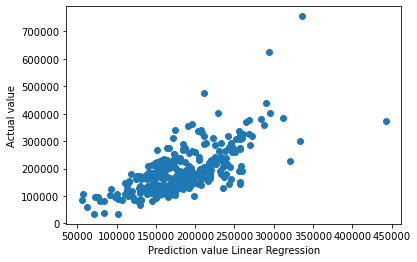

In [101]:
plt.scatter(y_prediction_lr,y_test)
plt.xlabel('Prediction value Linear Regression')
plt.ylabel('Actual value')

In [102]:
#Knn
from sklearn.neighbors import KNeighborsRegressor

#print(X_test)

k = 5
knn = KNeighborsRegressor(n_neighbors=k)

knn.fit(X_train,y_train)
y_predict_knn = knn.predict(X_test)

#print(y_predict)

In [103]:
from sklearn import metrics


#print(y_predict)

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_knn)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

mean = y_test.mean()
print('Error:',rmse/mean)

print('KNN RMSE:',rmse)

Error: 0.33845498350050635
KNN RMSE: 62466.21611973794


In [104]:
#10-fold cross validation score:
from sklearn.model_selection import cross_val_score


mse_list = cross_val_score(knn, X_Scaled, y, cv=10, scoring='neg_mean_squared_error')

#print(mse_list)

mse_list_positive = -mse_list

rmse_list = np.sqrt(mse_list_positive)
print("\n\nRMSE list:     ", rmse_list)

print("\n10-fold cross validation KNN:  ", rmse_list.mean())



RMSE list:      [60071.18264422 59930.50574797 60340.05442654 69182.97783841
 66484.33804316 63984.99812813 52549.50001829 56080.02948543
 67843.21977375 53787.6682561 ]

10-fold cross validation KNN:   61025.447436199385


Text(0, 0.5, 'Actual value')

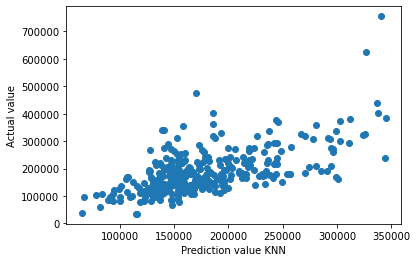

In [105]:
plt.scatter(y_predict_knn,y_test)
plt.xlabel('Prediction value KNN')
plt.ylabel('Actual value')

In [106]:
# random forest

from sklearn.ensemble import RandomForestRegressor
my_RandomForest = RandomForestRegressor(n_estimators = 3, random_state=9)

my_RandomForest.fit(X_train,y_train)
y_predict_rf = my_RandomForest.predict(X_test)

from sklearn import metrics


#print(y_prediction)

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_rf)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

mean = y_test.mean()
print('Error:',rmse/mean)
print('Random Forest Regressor RMSE:',rmse)



Error: 0.3552966089498056
Random Forest Regressor RMSE: 65574.55449975778


In [107]:
#10-fold cross validation score:
from sklearn.model_selection import cross_val_score


mse_list = cross_val_score(my_RandomForest, X_Scaled, y, cv=10, scoring='neg_mean_squared_error')

print(mse_list)

mse_list_positive = -mse_list

rmse_list = np.sqrt(mse_list_positive)
print("\n\n\RMSE list:     ", rmse_list)

print("\n10-fold cross validation Random Forest:  ", rmse_list.mean())

[-3.84590729e+09 -4.17264097e+09 -3.43916391e+09 -5.17826687e+09
 -5.68302771e+09 -3.69970550e+09 -3.10695059e+09 -2.83552056e+09
 -5.88748814e+09 -3.36637659e+09]


\RMSE list:      [62015.37945656 64595.98260501 58644.38514248 71960.17559472
 75385.85882905 60825.20446508 55740.02681723 53249.60622009
 76729.96900417 58020.48422599]

10-fold cross validation Random Forest:   63716.707236038965


Text(0, 0.5, 'Actual value')

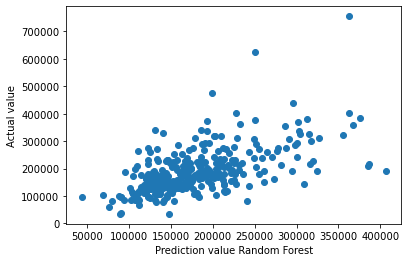

In [108]:
plt.scatter(y_predict_rf,y_test)
plt.xlabel('Prediction value Random Forest')
plt.ylabel('Actual value')

In [109]:
dt = DecisionTreeRegressor(random_state = 5)
dt.fit(X_train, y_train)

y_predict_dt = dt.predict(X_test)

#print(y_predict)

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_dt)

mean = y_test.mean()
print('Error:',rmse/mean)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('Decision Tree Regressor RMSE:',rmse)


Error: 0.3552966089498056
Decision Tree Regressor RMSE: 73217.31604943049


In [110]:
#10-fold cross validation score:
from sklearn.model_selection import cross_val_score


mse_list = cross_val_score(dt, X_Scaled, y, cv=10, scoring='neg_mean_squared_error')

print(mse_list)

mse_list_positive = -mse_list

rmse_list = np.sqrt(mse_list_positive)
print("\n\n\RMSE list:     ", rmse_list)

print("\n10-fold cross validation for Decision Tree:  ", rmse_list.mean())

[-8.18610205e+09 -7.39916836e+09 -5.61992511e+09 -8.95155095e+09
 -7.24876699e+09 -5.40510036e+09 -5.67550046e+09 -4.33725387e+09
 -7.55664707e+09 -4.08383830e+09]


\RMSE list:      [90477.080232   86018.41873827 74966.15977094 94612.63632708
 85139.69101649 73519.38764856 75335.91746583 65857.83071287
 86928.97714199 63904.91610915]

10-fold cross validation for Decision Tree:   79676.10151631798


Text(0, 0.5, 'Actual value')

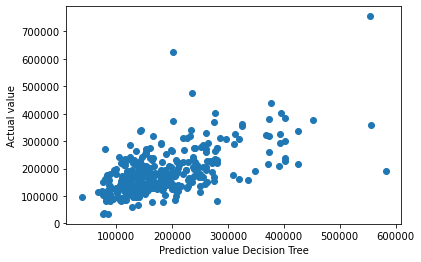

In [111]:
plt.scatter(y_predict_dt,y_test)
plt.xlabel('Prediction value Decision Tree')
plt.ylabel('Actual value')